<a href="https://colab.research.google.com/github/CesarSandoval714/Mineria-de-datos-CSVUEFA/blob/main/Mineria_de_Datos%20Matchs%20UEFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mineria de datos 

```
# Cesar Jaziel Sandoval Mata 
```



# 1.Adquisicion de datos

In [46]:
import requests
import io
import numpy as np
from math import sqrt
import random as rd
from bs4 import BeautifulSoup
import pandas as pd
from tabulate import tabulate
from typing import Tuple, List
from scipy import stats
import re
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.cluster import KMeans



def get_soup(url: str) -> BeautifulSoup:
    response = requests.get(url)
    return BeautifulSoup(response.content, 'html.parser')

def get_csv_from_url(url:str) -> pd.DataFrame:
    s=requests.get(url).content
    return pd.read_csv(io.StringIO(s.decode('utf-8')))

def print_tabulate(df: pd.DataFrame):
    print(tabulate(df, headers=df.columns, tablefmt='orgtbl'))


df = get_csv_from_url("https://raw.githubusercontent.com/CesarSandoval714/Mineria-de-datos-CSVUEFA/main/Uefa%20Euro%20Cup%20All%20Matches.csv")
df.head(200)


,Date,Time,HomeTeamName,AwayTeamName,HomeTeamGoals,AwayTeamGoals,Stage,SpecialWinConditions,Stadium,City,Attendance,Year
0,6 July 1960 (1960-07-06),20:00,France,Yugoslavia,4,5,Semi-finals,NaN,Parc des Princes,Paris,26370,1960
1,6 July 1960 (1960-07-06),21:30,Czechoslovakia,Soviet Union,0,3,Semi-finals,NaN,Stade Vélodrome,Marseille,25184,1960
2,9 July 1960 (1960-07-09),21:30,Czechoslovakia,France,2,0,Third place play-off,NaN,Stade Vélodrome,Marseille,9438,1960
3,10 July 1960 (1960-07-10),21:30,Soviet Union,Yugoslavia,2,1,Final,Soviet Union win after extra time,Parc des Princes,Paris,17966,1960
4,17 June 1964 (1964-06-17),20:00,Spain,Hungary,2,1,Semi-finals,Spain win after extra time,Santiago Bernabéu,Madrid,34713,1964
...,...,...,...,...,...,...,...,...,...,...,...,...
195,18 June 2008 (2008-06-18),20:45,Greece,Spain,1,2,Group D,NaN,Stadion Wals-Siezenheim,Salzburg,30883,2008
196,18 June 2008 (2008-06-18),20:45,Russia,Sweden,2,0,Group D,NaN,Tivoli-Neu,Innsbruck,30772,2008
197,19 June 2008 (2008-06-19),20:45,Portugal,Germany,2,3,Quarter-finals,NaN,St. Jakob-Park,Basel,39374,2008
198,20 June 2008 (2008-06-20),20:45,Croatia,Turkey,1,1,Quarter-finals,Turkey win on Penalities 1–3,Ernst-Happel-Stadion,Vienna,51428,2008


# 2.Limpieza de datos

In [47]:
df.shape

(286, 12)

In [48]:
#Eliminaremos columnas irrelevantes
def clean_data(df):
    df= df.drop(columns = ['SpecialWinConditions','Time']) 
    return df

df= clean_data(df)

print(df)

                          Date     HomeTeamName   AwayTeamName  HomeTeamGoals  \
0     6 July 1960 (1960-07-06)          France      Yugoslavia              4   
1     6 July 1960 (1960-07-06)  Czechoslovakia    Soviet Union              0   
2     9 July 1960 (1960-07-09)  Czechoslovakia          France              2   
3    10 July 1960 (1960-07-10)    Soviet Union      Yugoslavia              2   
4    17 June 1964 (1964-06-17)           Spain         Hungary              2   
..                         ...              ...            ...            ...   
281   2 July 2016 (2016-07-02)         Germany           Italy              1   
282   3 July 2016 (2016-07-03)          France         Iceland              5   
283   6 July 2016 (2016-07-06)        Portugal           Wales              2   
284   7 July 2016 (2016-07-07)         Germany          France              0   
285  10 July 2016 (2016-07-10)        Portugal          France              1   

     AwayTeamGoals         

In [49]:
df.isna().sum()

Date             0
HomeTeamName     0
AwayTeamName     0
HomeTeamGoals    0
AwayTeamGoals    0
Stage            0
Stadium          0
City             0
Attendance       0
Year             0
dtype: int64



```
# Vemos que no contiene columnas nulas 
```



In [50]:
tabla_asistencia = df["Attendance"]
tabla_asistencia

0      26370
1      25184
2       9438
3      17966
4      34713
       ...  
281    38764
282    76833
283    55679
284    64078
285    75868
Name: Attendance, Length: 286, dtype: int64

In [51]:
tabla_estadios = df["Stadium"]
tabla_estadios


0               Parc des Princes
1                Stade Vélodrome
2                Stade Vélodrome
3               Parc des Princes
4              Santiago Bernabéu
                 ...            
281    Nouveau Stade de Bordeaux
282              Stade de France
283      Parc Olympique Lyonnais
284              Stade Vélodrome
285              Stade de France
Name: Stadium, Length: 286, dtype: object

In [52]:
tabla_años = df["Year"]
tabla_años

0      1960
1      1960
2      1960
3      1960
4      1964
       ... 
281    2016
282    2016
283    2016
284    2016
285    2016
Name: Year, Length: 286, dtype: int64

In [53]:
type(df)

pandas.core.frame.DataFrame

# Analisis de datos 

In [54]:
df.Stadium.unique()

array(['Parc des Princes', 'Stade Vélodrome', 'Santiago Bernabéu',
       'Camp Nou', 'Stadio San Paolo', 'Stadio Comunale',
       'Stadio Olimpico', 'Stade Émile Versé', 'Bosuilstadion',
       'Stade Maurice Dufrasne', 'Heysel Stadium', 'Stadion Maksimir',
       'Red Star Stadium', 'San Siro', 'Stade Félix-Bollaert',
       'Stade de la Beaujoire', 'Stade de Gerland',
       'Stade Geoffroy-Guichard', 'Stade de la Meinau', 'Rheinstadion',
       'Niedersachsenstadion', 'Parkstadion', 'Waldstadion',
       'Olympiastadion', 'Müngersdorfer Stadion', 'Neckarstadion',
       'Volksparkstadion', 'Råsunda Stadium', 'Malmö Stadion', 'Ullevi',
       'Idrottsparken', 'Wembley Stadium', 'Villa Park', 'Elland Road',
       "St James' Park", 'Old Trafford', 'Anfield', 'Hillsborough',
       'City Ground', 'Philips Stadion', 'GelreDome',
       'Stade du Pays de Charleroi', 'Feijenoord Stadion',
       'King Baudouin Stadium', 'Amsterdam Arena', 'Jan Breydel Stadium',
       'De Kuip', 'Estádi

In [55]:
df.Attendance.unique()

array([26370, 25184,  9438, 17966, 34713, 38556,  3869, 79115, 68582,
       21834, 68817, 32886,  1659, 55669,  6184, 43066, 17879, 50652,
        6766, 30790, 10500, 14990, 29889,  7614, 11889, 13901, 15186,
       46337, 11430, 59649, 14440, 42318, 24652, 47860, 47570, 41525,
       51359, 34736, 47510, 36911, 44707, 16972, 31787, 24364, 47691,
       24464, 54848, 47843, 47368, 62552, 55707, 64812, 47506, 63802,
       53951, 51373, 54336, 63940, 38308, 48335, 64731, 56115, 61606,
       62770, 29860, 26385, 26535, 29902, 30126, 25763, 35720, 17410,
       17638, 34440, 37725, 14660, 28827, 37450, 37800, 76567, 34363,
       36800, 76864, 34926, 76798, 24006, 26323, 19107, 35626, 26976,
       32719, 37300, 35120, 37320, 50760, 21128, 53740, 34993, 22460,
       22670, 33671, 20484, 28951, 75440, 37465, 43412, 26832, 43877,
       75862, 73611, 28500, 31500, 28400, 29000, 30000, 44000, 46700,
       22500, 44500, 27000, 48000, 41000, 18500, 51300, 28750, 26611,
       21000, 28100,

In [56]:
df.Year.unique()

array([1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000,
       2004, 2008, 2012, 2016])

In [57]:
gender_frame = pd.DataFrame(data=df['Attendance'])
gender_frame 
x=max(tabla_asistencia)
y=min(tabla_asistencia)
z= df["Attendance"].mean()
w=df["Attendance"].median()
m = df["Attendance"].mode()
r=df["Attendance"].count()
s=df["Attendance"].sum()
k=df["Attendance"].kurtosis()
v=df["Attendance"].var()
d=df["Attendance"].std()
print("Max {0}\n Min {1}\n Promedio {2}\n Mediana {3}\n moda {4}\n Conteo {5}\n Suma {6}\n Kutosis {7}\n Varianza {8}\n Desviacion Estandar {9}\n".format(x,y,z,w,m,r,s,k,v,d))

Max 79115
 Min 1659
 Promedio 40220.32167832168
 Mediana 38746.5
 moda 0    51428
dtype: int64
 Conteo 286
 Suma 11503012
 Kutosis -0.1758606767158617
 Varianza 247896158.21896684
 Desviacion Estandar 15744.718422981303



In [58]:
g = df.groupby(['Stadium','Year', "Attendance"]).mean()
g

HomeTeamGoals  AwayTeamGoals
Stadium            Year Attendance                              
Amsterdam Arena    2000 42000            0.000000       2.000000
                        50000            1.000000       1.500000
                        50800            1.000000       0.000000
                        51300            1.000000       2.000000
Anfield            1996 21128            3.000000       3.000000
...                                           ...            ...
Wembley Stadium    1996 75862            1.000000       1.000000
                        76567            1.000000       1.000000
                        76798            1.000000       4.000000
                        76864            0.000000       2.000000
Wörthersee Stadion 2008 30461            1.333333       0.666667

[262 rows x 2 columns]

In [59]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           286 non-null    object
 1   HomeTeamName   286 non-null    object
 2   AwayTeamName   286 non-null    object
 3   HomeTeamGoals  286 non-null    int64 
 4   AwayTeamGoals  286 non-null    int64 
 5   Stage          286 non-null    object
 6   Stadium        286 non-null    object
 7   City           286 non-null    object
 8   Attendance     286 non-null    int64 
 9   Year           286 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 22.5+ KB


# 4.Graficación

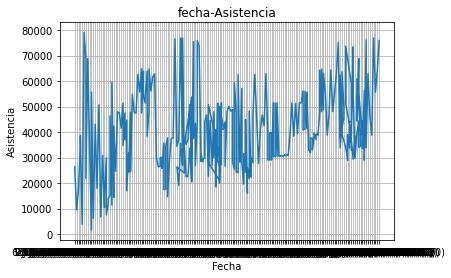

In [60]:
plt.plot(df['Date'], df['Attendance'], label='Asistencia')


plt.xlabel('Fecha')
plt.ylabel('Asistencia')
plt.title('fecha-Asistencia')
plt.grid(True)

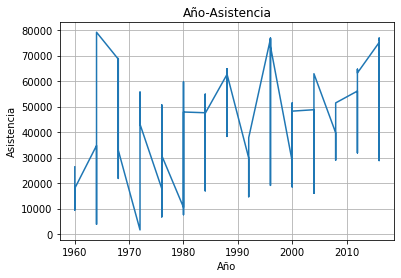

In [61]:
plt.plot(df['Year'], df['Attendance'], label='Asistencia')


plt.xlabel('Año')
plt.ylabel('Asistencia')
plt.title('Año-Asistencia')
plt.grid(True)

In [62]:
fig = go.Figure()

fig.add_trace(go.Bar(x=df['Year'], y=df['Attendance']))

fig.update_layout(
    xaxis=dict(
        title_text='AÑO',
        titlefont=dict(size=30),
    ),
    yaxis=dict(
        title_text="ASISTENCIA",
        
        titlefont=dict(size=30)
    ),
    title="Acumulado de asistencia por Año"
)

fig.show()

In [63]:
fig = go.Figure()

fig.add_trace(go.Bar(x=df['Date'], y=df['Attendance']))

fig.update_layout(
    xaxis=dict(
        title_text='FECHA',
        titlefont=dict(size=30),
    ),
    yaxis=dict(
        title_text="ASISTENCIA",
        
        titlefont=dict(size=30)
    ),
    title="Acumulado de asistencia por fecha"
)

fig.show()

In [64]:
fig = go.Figure()

fig.add_trace(go.Bar(x=df['Stadium'], y=df['Attendance']))

fig.update_layout(
    xaxis=dict(
        title_text='ESTADIO',
        titlefont=dict(size=30),
    ),
    yaxis=dict(
        title_text="ASISTENCIA",
        
        titlefont=dict(size=30)
    ),
    title="Acumulado de asistencia por estadio"
)

fig.show()

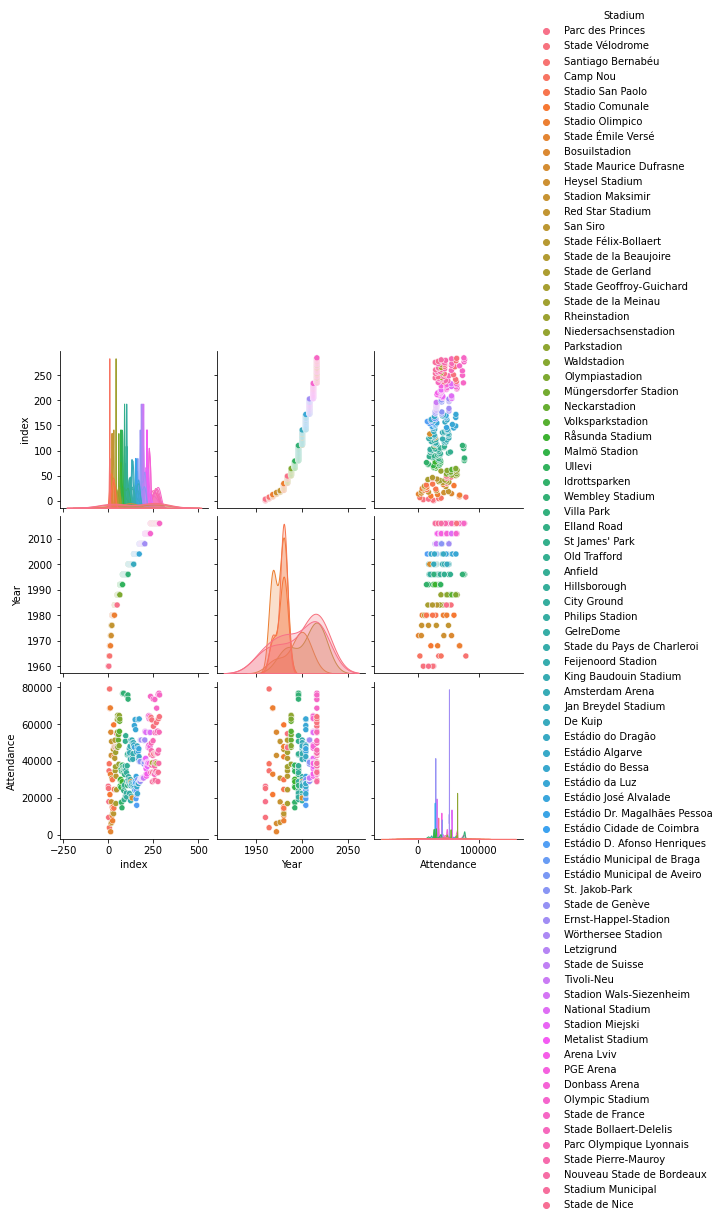

In [111]:
sns.pairplot(dateAsistencia, hue="Stadium")

# 5.Prueba de hipotesis

In [76]:
AsistenciaEstadioCharleroi = df.Attendance[df.Stadium =="Stade du Pays de Charleroi"]
AsistenciaEstadioGelreDome = df.Attendance[df.Stadium =="GelreDome"]



from scipy import stats
anova = stats.f_oneway(AsistenciaEstadioCharleroi, AsistenciaEstadioGelreDome)
anova

F_onewayResult(statistic=0.18704521054515091, pvalue=0.6876833697469289)

In [77]:
stats.ttest_ind(df.Attendance.loc[df.Stadium=='Stade du Pays de Charleroi'],
                df.Attendance.loc[df.Stadium=='GelreDome'],nan_policy='omit')

Ttest_indResult(statistic=0.43248723743614725, pvalue=0.687683369746929)

In [79]:
fig = go.Figure()
# Hipotesis de que hubo mas asistencia en el estadio Charleroi que en GelreDome
fig.add_trace(go.Box(y=df.Attendance.loc[df.Stadium=='Stade du Pays de Charleroi'],name="CHARLEROI"))
fig.add_trace(go.Box(y=df.Attendance.loc[df.Stadium=='GelreDome'],name="GELREDOME"))
fig.update_layout(
    title={
        'text': "Asistencia a estadios",
        'y':0.8,
        'x':0.4,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

# 6. Regresion Lineal 

Text(0.5, 1.0, 'Regresion Lineal año-asistencia')

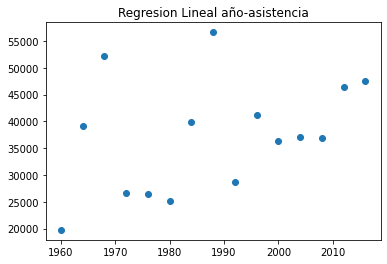

In [85]:
dateAsistencia = pd.DataFrame()
dateAsistencia['Year'] = df['Year']
dateAsistencia ['Attendance']= df['Attendance']

dateAsistencia = dateAsistencia.groupby(pd.Grouper(key='Year')).mean().reset_index()
dateAsistencia=dateAsistencia.reset_index()

modelo = LinearRegression().fit(dateAsistencia['index'].values.reshape((-1,1)), dateAsistencia['Attendance'])

meanLine = [[df['Attendance'].mean()],[df['Attendance'].mean()]]

plt.scatter(dateAsistencia['Year'], dateAsistencia['Attendance'])
plt.title("Regresion Lineal año-asistencia")

Text(0.5, 1.0, 'Regresion Lineal año-asistencia')

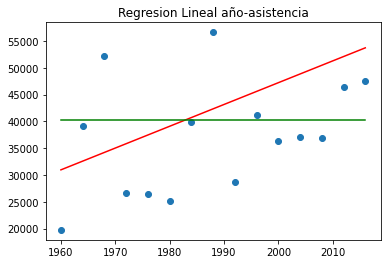

In [106]:
dateAsistencia = pd.DataFrame()
dateAsistencia['Year'] = df['Year']
dateAsistencia ['Attendance']= df['Attendance']

dateAsistencia = dateAsistencia.groupby(pd.Grouper(key='Year')).mean().reset_index()
dateAsistencia=dateAsistencia.reset_index()

modelo = LinearRegression().fit(dateAsistencia['index'].values.reshape((-1,1)), dateAsistencia['Attendance'])

meanLine = [[df['Attendance'].mean()],[df['Attendance'].mean()]]

plt.scatter(dateAsistencia['Year'], dateAsistencia['Attendance'])

plt.plot([[1960],[2016]], modelo.predict([[0],[25]]), color = 'red')
plt.plot([[1960],[2016]], meanLine, color = 'green')

plt.title("Regresion Lineal año-asistencia")

# 7.Forecasting

b =  30957.79664848197
m =  [911.40847502]
[30957.79664848 76528.22039943]
40220.32167832168


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=15



Text(0.5, 1.0, 'Regresion Lineal con forecasting año-precio')

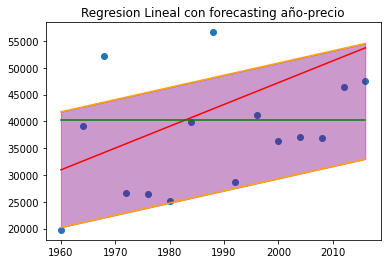

In [104]:
dateAsistencia = pd.DataFrame()
dateAsistencia['Year'] = df['Year']
dateAsistencia ['Attendance']= df['Attendance']

dateAsistencia = dateAsistencia.groupby(pd.Grouper(key='Year')).mean().reset_index()
dateAsistencia=dateAsistencia.reset_index()


results = smf.ols('Attendance~index', dateAsistencia).fit()
predicts = results.predict()

bands = pd.read_html(results.summary().tables[1].as_html(),header=0,index_col=0)[0]
coef = pd.read_html(results.summary().tables[1].as_html(),header=0,index_col=0)[0]['coef']
m = coef.values[1]
b = coef.values[0]
low = bands['[0.025'][0]
hi = bands['0.975]'][0]



lowBand = m * dateAsistencia['index'] + low
highBand = m * dateAsistencia['index'] + hi


b0 = results.params[0]
b1 = results.params[1]
dateAsistencia['prediction'] = b0 + b1*dateAsistencia['Attendance']

modelo = LinearRegression().fit(dateAsistencia['index'].values.reshape((-1,1)), dateAsistencia['Attendance'])
print("b = ", modelo.intercept_)
print("m = ", modelo.coef_)

print(modelo.predict([[0],[50]]))
print(df['Attendance'].mean())

meanLine = [[df['Attendance'].mean()],[df['Attendance'].mean()]]

plt.scatter(dateAsistencia['Year'], dateAsistencia['Attendance'])
plt.plot([[1960],[2016]], modelo.predict([[0],[25]]), color = 'red')
plt.plot([[1960],[2016]], meanLine, color = 'green')

plt.plot(dateAsistencia['Year'], lowBand, color='orange')
plt.plot(dateAsistencia['Year'], highBand, color='orange')
plt.fill_between(dateAsistencia['Year'], lowBand, highBand, alpha=0.4, color = 'purple')
plt.title("Regresion Lineal con forecasting año-precio")

#8.Clasificación 

     index  Year  Attendance                    Stadium
0        0  1960       26370           Parc des Princes
1        1  1960       25184            Stade Vélodrome
2        2  1960        9438            Stade Vélodrome
3        3  1960       17966           Parc des Princes
4        4  1964       34713          Santiago Bernabéu
..     ...   ...         ...                        ...
281    281  2016       38764  Nouveau Stade de Bordeaux
282    282  2016       76833            Stade de France
283    283  2016       55679    Parc Olympique Lyonnais
284    284  2016       64078            Stade Vélodrome
285    285  2016       75868            Stade de France

[286 rows x 4 columns]


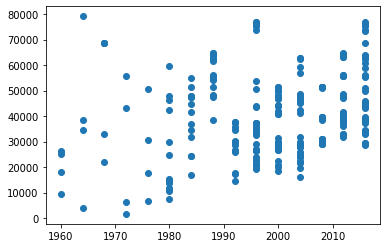

In [109]:
dateAsistencia = pd.DataFrame()
dateAsistencia['Year'] = df['Year']
dateAsistencia ['Attendance']= df['Attendance']
dateAsistencia ['Stadium']= df['Stadium']
dateAsistencia=dateAsistencia.reset_index()

print(dateAsistencia)

plt.scatter(dateAsistencia['Year'], dateAsistencia['Attendance'])

# Clustering

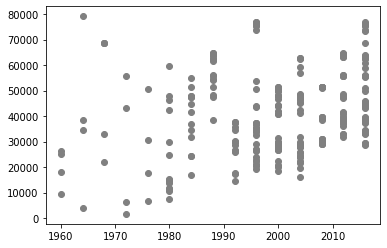

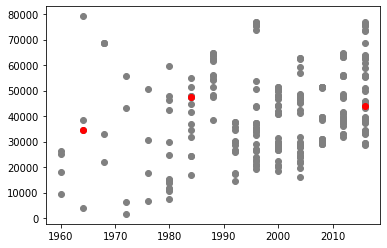

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



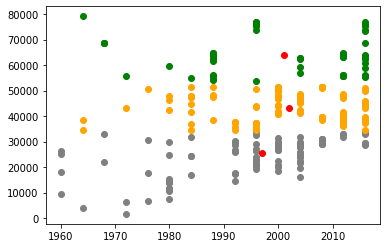

In [110]:
X = df[["Year", "Attendance"]]
plt.scatter(X["Year"], X["Attendance"], c="grey")
plt.show()

K=3

Centroids = (X.sample(n=K))
plt.scatter(X["Year"], X["Attendance"], c="grey")
plt.scatter(Centroids["Year"], Centroids["Attendance"], c="red")
plt.show()

Centroids
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1, row_c in Centroids.iterrows():
        ED=[]
        for index2, row_d in XD.iterrows():
            d1 = (row_c["Year"]-row_d["Year"])**2
            d2 = (row_c["Attendance"]-row_d["Attendance"])**2
            d = sqrt(d1+d2)
            ED.append(d)
        X[i] = ED
        i = i+1
    
    C = []
    for index, row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Attendance", "Year"]]
    if j == 0:
        diff = 1
        j = j+1
    else:
        diff = (Centroids_new['Attendance'] - Centroids['Attendance']).sum() + (Centroids_new['Year'] - Centroids['Year']).sum()
        #print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Attendance","Year"]]

color=['grey','green','orange']
for k in range(K):
    df=X[X["Cluster"]==k+1]
    plt.scatter(df["Year"],df["Attendance"],c=color[k])
plt.scatter(Centroids["Year"],Centroids["Attendance"],c='red')
plt.show()